In [ ]:
import random

In [ ]:
# Step 1: Load the header (only the first line to preserve column names)
with open("/content/drive/MyDrive/GUVICLASS/household_power_consumption.txt", "r", encoding="utf-8") as file:
    header = file.readline()  # this gets the first line (column names)
    rest_of_lines = file.readlines()  # remaining lines (the data)

In [ ]:
# Step 2: Sample 200000 lines randomly from the data
import random
random.seed(42)  # for reproducibility
sampled_lines = random.sample(rest_of_lines, 200000)

In [ ]:
# Step 3: Write the sampled data to a new file (include the header)
with open("reduced_household_power.txt", "w", encoding="utf-8") as file:
    file.write(header)  # write the column names
    file.writelines(sampled_lines)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
df = pd.read_csv('/content/reduced_household_power.txt', sep=";", low_memory=False, na_values=["?"], parse_dates={"datetime": ["Date", "Time"]}, infer_datetime_format=True)
df.head(10)

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4/7/2009 22:59:00,1.036,0.116,242.56,4.2,0.0,0.0,0.0
1,27/5/2007 20:42:00,1.680,0.046,236.15,7.0,0.0,0.0,17.0
2,22/1/2007 03:35:00,0.216,0.000,244.26,0.8,0.0,0.0,0.0
3,30/11/2009 16:28:00,0.608,0.124,247.77,2.8,0.0,0.0,5.0
4,21/1/2008 06:22:00,0.482,0.198,240.98,2.2,0.0,1.0,0.0
5,8/12/2007 08:59:00,2.452,0.000,236.70,10.2,0.0,0.0,17.0
6,6/11/2007 19:10:00,3.944,0.066,235.11,16.8,0.0,37.0,0.0
7,7/7/2007 22:36:00,1.568,0.000,238.61,6.6,0.0,0.0,18.0
8,23/11/2009 06:56:00,2.808,0.000,239.51,12.0,0.0,0.0,18.0
9,14/5/2007 23:51:00,0.460,0.198,238.74,2.0,0.0,1.0,0.0


Observation - 1

From the Dataset Information, we know that the dataset contains missing values in the measurements (nearly 1,25% of the rows). So, While loading the dataset converting the "?" into null values on the respective columns.




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   datetime               200000 non-null  object 
 1   Global_active_power    197492 non-null  float64
 2   Global_reactive_power  197492 non-null  float64
 3   Voltage                197492 non-null  float64
 4   Global_intensity       197492 non-null  float64
 5   Sub_metering_1         197492 non-null  float64
 6   Sub_metering_2         197492 non-null  float64
 7   Sub_metering_3         197492 non-null  float64
dtypes: float64(7), object(1)
memory usage: 12.2+ MB


Observation - 2

As we treated the unknown character "?" as null value. The columns datatype are treated based on the respective values.

In [ ]:
df.shape

(200000, 8)

In [ ]:
df.isnull().sum().any()

np.True_

In [ ]:
df.isnull().sum()

,0
datetime,0
Global_active_power,2508
Global_reactive_power,2508
Voltage,2508
Global_intensity,2508
Sub_metering_1,2508
Sub_metering_2,2508
Sub_metering_3,2508


Observation - 3

All the columns contain null values of 2,508 rows.

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,197492.000000,197492.000000,197492.000000,197492.000000,197492.000000,197492.000000,197492.000000
mean,1.090934,0.123700,240.836203,4.624088,1.122623,1.298027,6.465118
std,1.052588,0.112344,3.239748,4.422755,6.146779,5.820541,8.433181
min,0.076000,0.000000,224.920000,0.200000,0.000000,0.000000,0.000000
25%,0.308000,0.048000,238.980000,1.400000,0.000000,0.000000,0.000000
50%,0.602000,0.100000,241.000000,2.600000,0.000000,0.000000,1.000000
75%,1.528000,0.194000,242.880000,6.400000,0.000000,1.000000,17.000000
max,9.994000,1.274000,254.150000,43.000000,83.000000,80.000000,31.000000


Data Visualization Analysis

Observation - 4

Checks for the Outlier using Box Plot and Histogram visualization

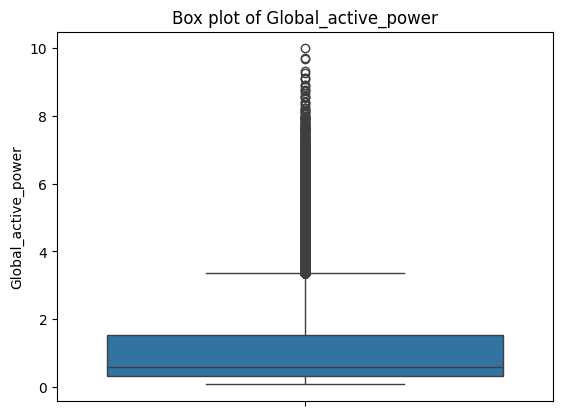

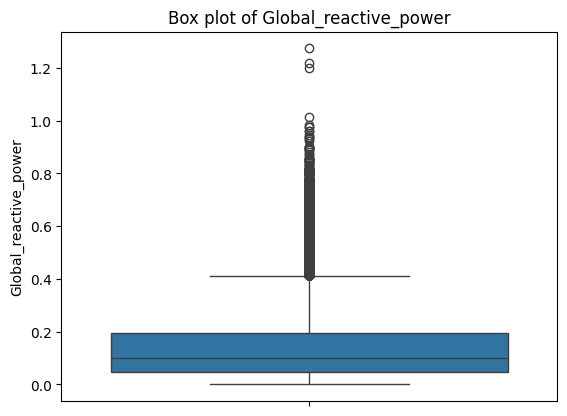

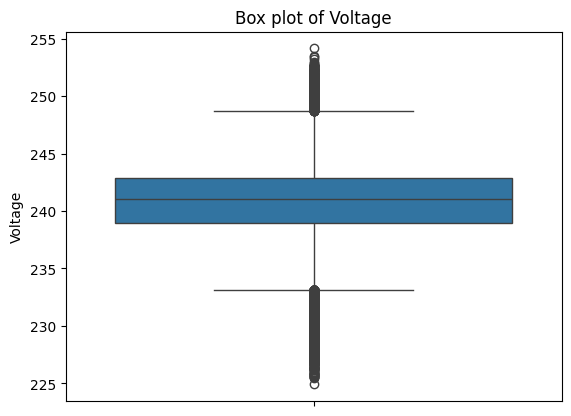

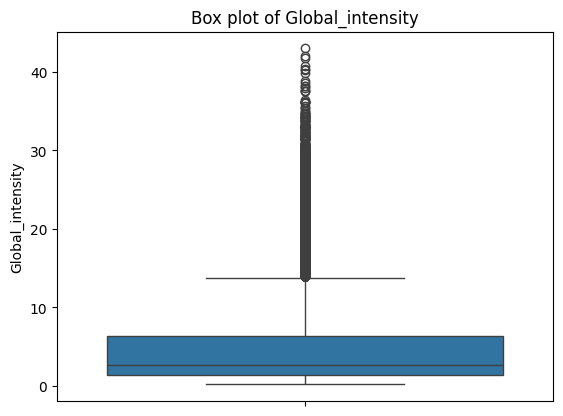

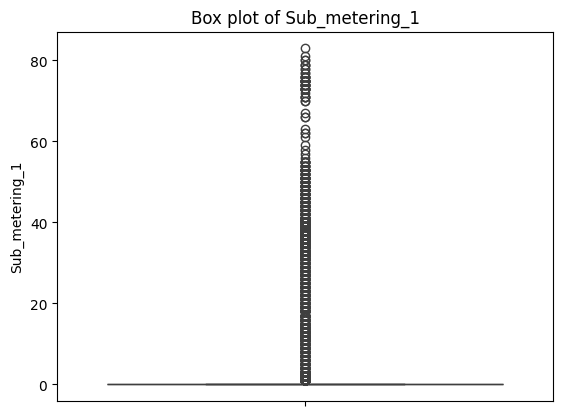

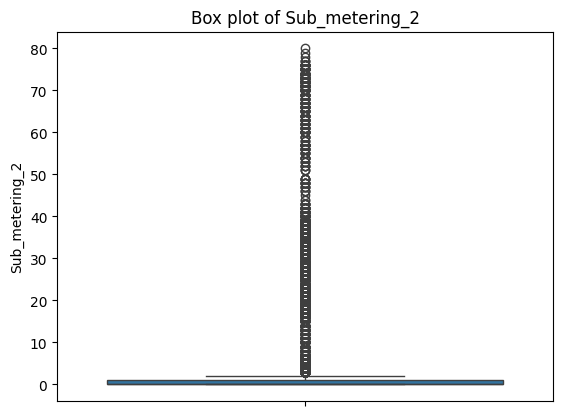

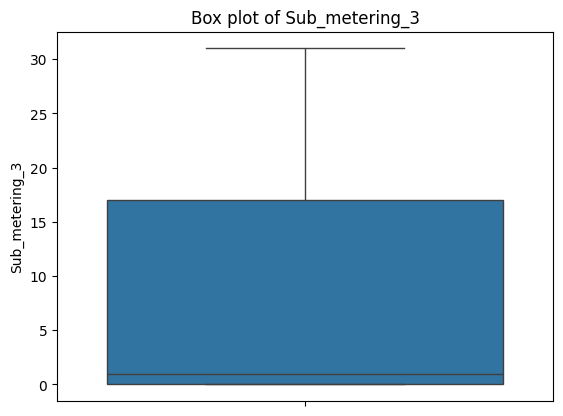

In [ ]:
# Box Plot Visualization

col_list = df.columns
for i in col_list[1:]:
  sns.boxplot(y=df[i])
  plt.title(f"Box plot of {i}")
  plt.show()

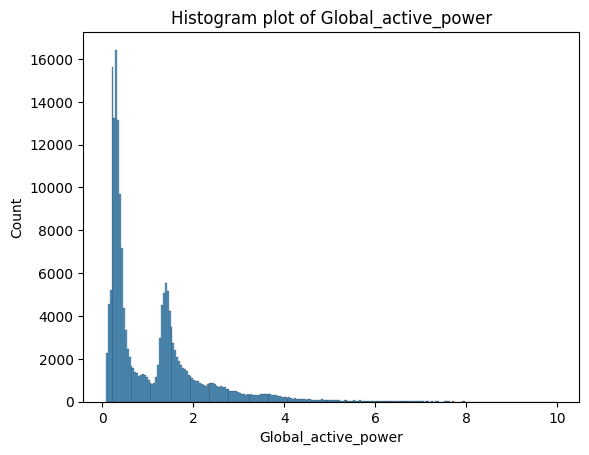

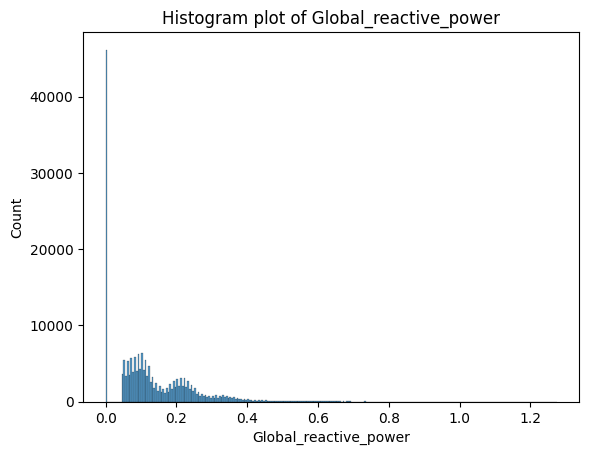

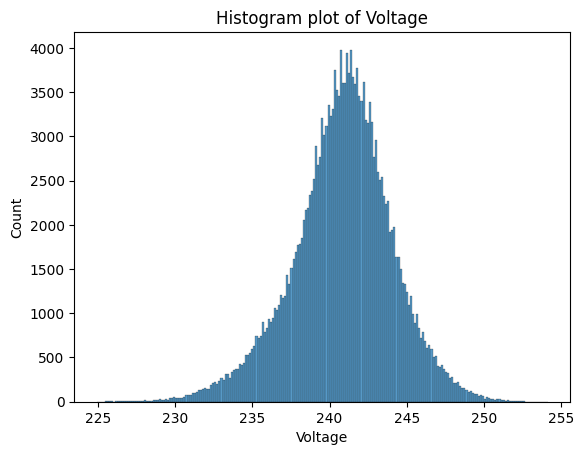

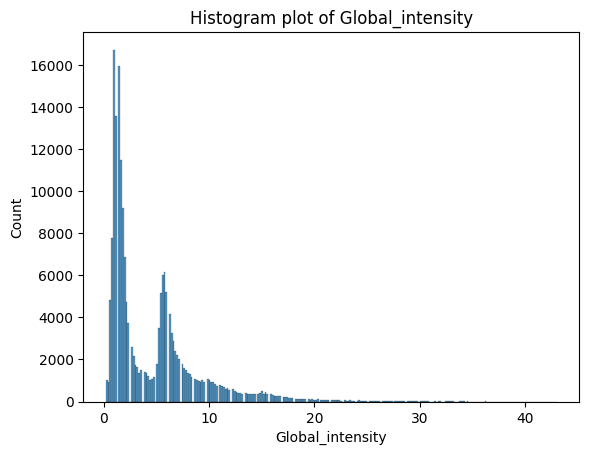

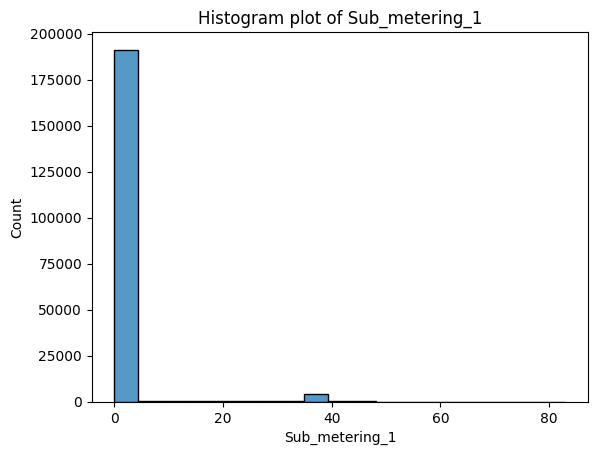

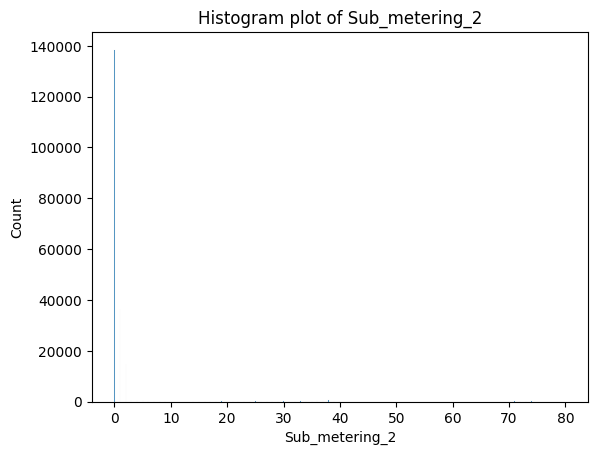

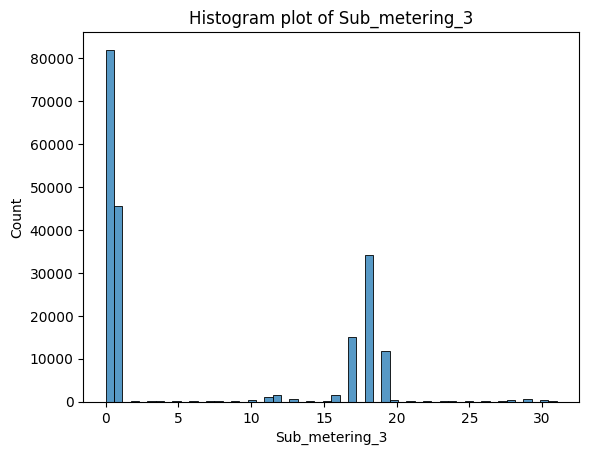

In [ ]:
# Histogram Visualization

for i in col_list[1:]:
  sns.histplot(data=df,x=df[i])
  plt.title(f"Histogram plot of {i}")
  plt.show()

In [ ]:
# Convert 'datetime' column to datetime format explicitly
df["datetime"] = pd.to_datetime(df["datetime"], errors="coerce")

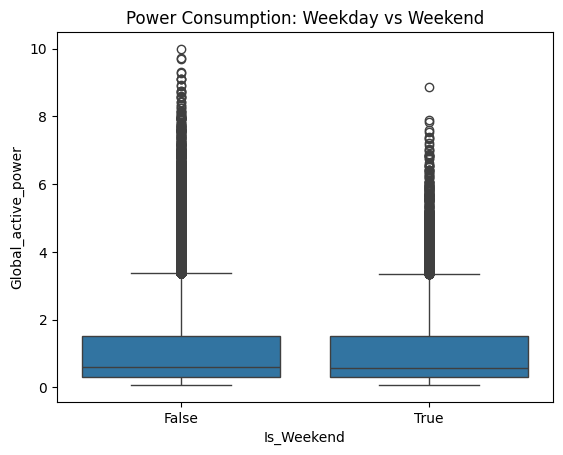

In [ ]:
df["Day_of_Week"] = df["datetime"].dt.dayofweek
df["Is_Weekend"] = df["Day_of_Week"].isin([5, 6])

weekend_data = df[df["Is_Weekend"]]
weekday_data = df[~df["Is_Weekend"]]

sns.boxplot(x="Is_Weekend", y="Global_active_power", data=df)
plt.title("Power Consumption: Weekday vs Weekend")
plt.show()

df.drop(["Day_of_Week","Is_Weekend"],axis=1,inplace=True)


**Observation - 5**

The outliers were cross-verified with the dates and identified as genuine, as the high values occur during weekdays.


Trend Analysis

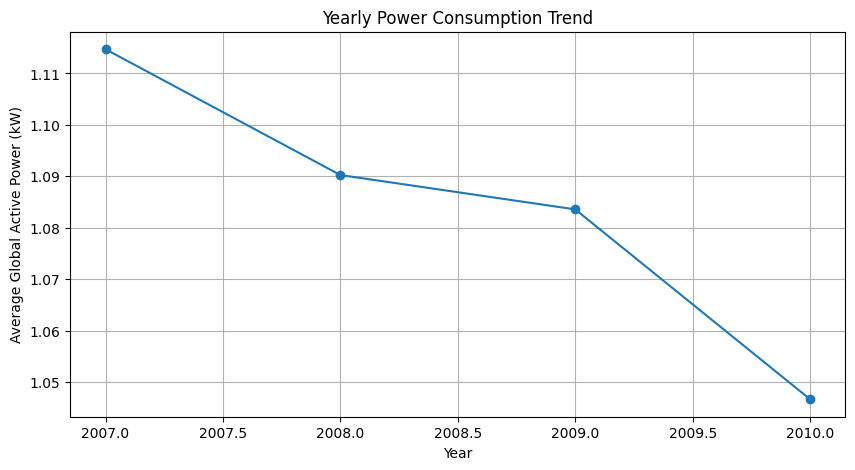

In [ ]:
# Group by year and calculate the average power consumption
yearly_trend = df.groupby(df["datetime"].dt.year)["Global_active_power"].mean()

# Plot
plt.figure(figsize=(10,5))
yearly_trend.plot(kind="line", marker="o", title="Yearly Power Consumption Trend")
plt.xlabel("Year")
plt.ylabel("Average Global Active Power (kW)")
plt.grid()
plt.show()

**Observation - 6**

The average consumption in 2007 is notably higher compared to subsequent years, indicating possible anomalies or increased household activity during that year.

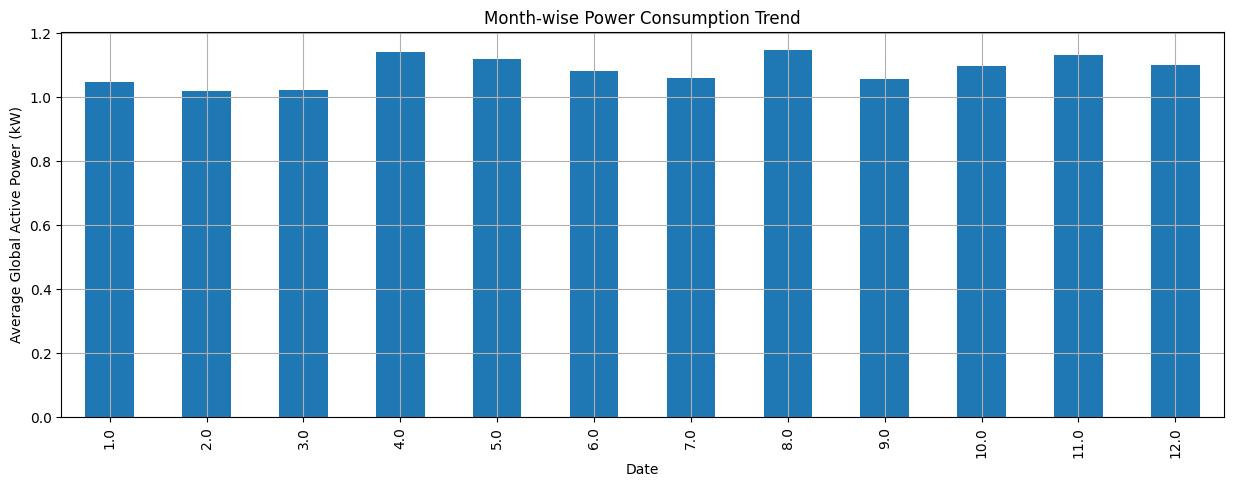

In [ ]:
# Group by month and calculate the average power consumption
monthly_trend = df.groupby(df["datetime"].dt.month)["Global_active_power"].mean()

# Plot
plt.figure(figsize=(15, 5))
monthly_trend.plot(kind="bar", title="Month-wise Power Consumption Trend")
plt.xlabel("Date")
plt.ylabel("Average Global Active Power (kW)")
plt.grid()
plt.show()

# Observation - 7

The highest average power consumption occurs in April, August and November, likely due to increased heating requirements during the winter season. The peak in November.

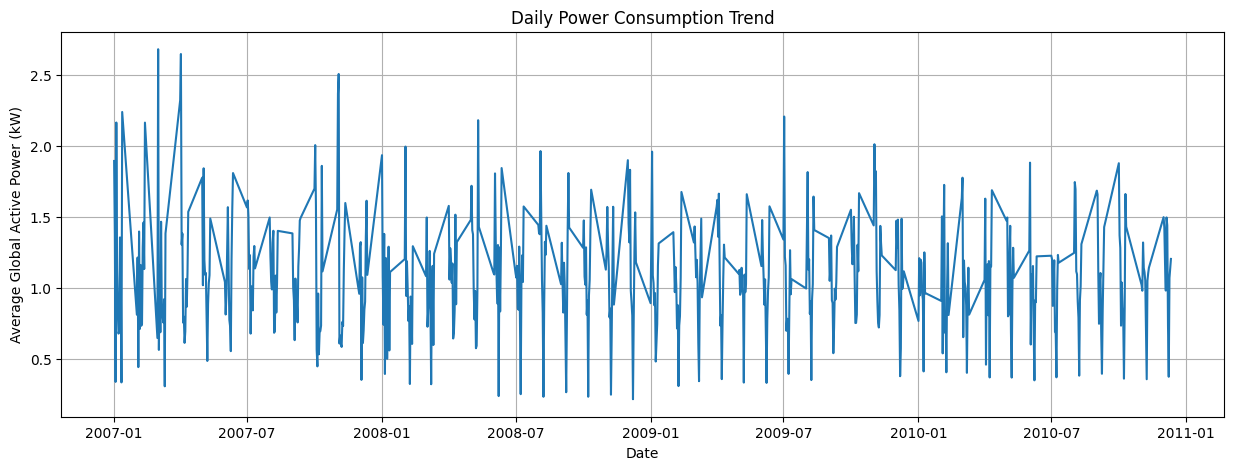

In [ ]:
# Group by day and calculate the average power consumption
daily_trend = df.groupby(df["datetime"].dt.date)["Global_active_power"].mean()

# Plot
plt.figure(figsize=(15, 5))
daily_trend.plot(kind="line", title="Daily Power Consumption Trend")
plt.xlabel("Date")
plt.ylabel("Average Global Active Power (kW)")
plt.grid()
plt.show()

# Observation - 8

The general decline in daily power usage might indicate the adoption of energy-efficient appliances or behavioral changes. Winter peaks likely align with increased heating demands, while summer dips could reflect lower energy requirements

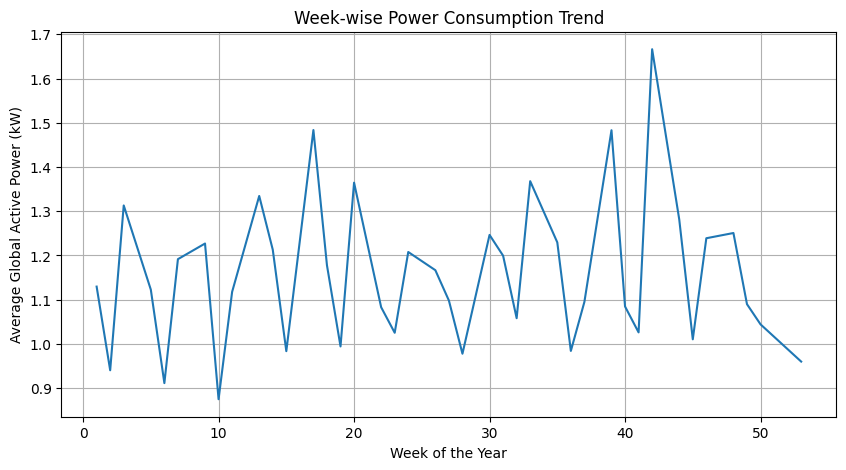

In [ ]:
# Group by week and calculate the average power consumption
weekly_trend = df.groupby(df["datetime"].dt.isocalendar().week)["Global_active_power"].mean()

# Plot
plt.figure(figsize=(10, 5))
weekly_trend.plot(kind="line", title="Week-wise Power Consumption Trend")
plt.xlabel("Week of the Year")
plt.ylabel("Average Global Active Power (kW)")
plt.grid()
plt.show()

# Observation - 9

The week-wise power consumption trend shows noticeable fluctuations throughout the year, with significant peaks around weeks 17, 39, and especially 42. Overall, the average power consumption remains between 0.9 to 1.7 kW across weeks.

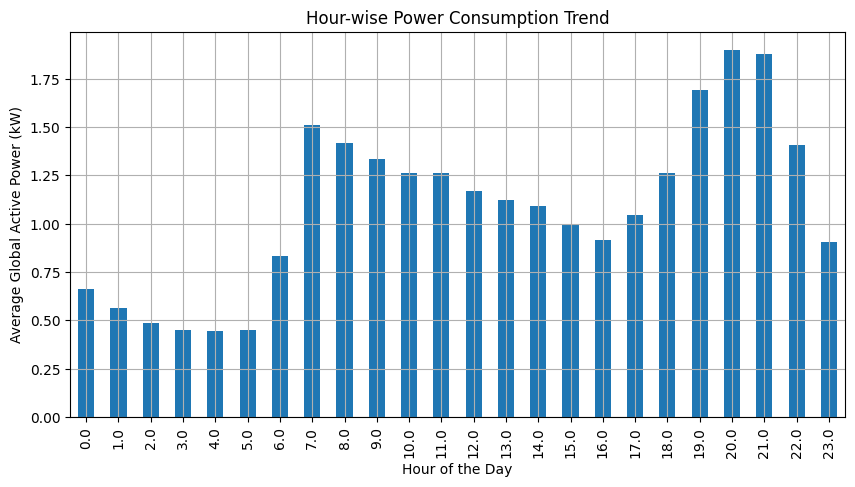

In [ ]:
# Group by hour and calculate the average power consumption
hourly_trend = df.groupby(df["datetime"].dt.hour)["Global_active_power"].mean()

# Plot
plt.figure(figsize=(10, 5))
hourly_trend.plot(kind="bar", title="Hour-wise Power Consumption Trend")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Global Active Power (kW)")
plt.grid()
plt.show()


# **Observation - 10**

The highest power consumption occurs between 7 AM and 9 AM & between 7 AM and 9 AM, which aligns with morning and evening routines. The data shows clear daily patterns in power usage, with peaks corresponding to typical human activity cycles (morning and evening).

# Data Preprocessing


In [ ]:

# Handling Missing values

for _ in df.columns:
    df[_].fillna(df[_].median(), inplace=True)

In [ ]:
df.isnull().sum().any()

np.False_

In [ ]:
# Adding few features from the existing datetime features

df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["day"] = df["datetime"].dt.day
df["hour"] = df["datetime"].dt.hour

Creating additional Features:

1. Daily Average
2. Peak Hour
3. Rolling Average
4. Hourly Consumption

In [ ]:
# Daily Average

daily_average = df.groupby(df["datetime"].dt.date)["Global_active_power"].mean()
df["daily_average"] = df["datetime"].dt.date.map(daily_average)

In [ ]:
# Peak Hour

hourly_avg = df.groupby([df["datetime"].dt.date,df["datetime"].dt.hour])["Global_active_power"].sum()
peak_hour_per_day = hourly_avg.groupby(level=0).max()
df["peak_hour"] = df["datetime"].dt.date.map(peak_hour_per_day)

In [ ]:
# Rolling Average

rolling_average = (df.groupby(df["datetime"].dt.date)["Global_active_power"].apply(lambda x: x.rolling(window=2, min_periods=1).mean()))
df["rolling_average"] = rolling_average.reset_index(drop=True)

In [ ]:
# Hourly Consumption

hourly_consumption = df.groupby([df["datetime"].dt.date, df["datetime"].dt.hour])["Global_active_power"].sum()
hourly_consumption.index.set_names(["date", "hour"], inplace=True)
data_hrs = hourly_consumption.reset_index()
data_hrs.columns = ["date", "hour", "hourly_consumption"]
df["date"] = df["datetime"].dt.date
df = pd.merge(df, data_hrs, on=["date", "hour"], how="left")
df.drop("date",axis=1,inplace=True)

# Feature selection using Correlation matrix and Heatmap

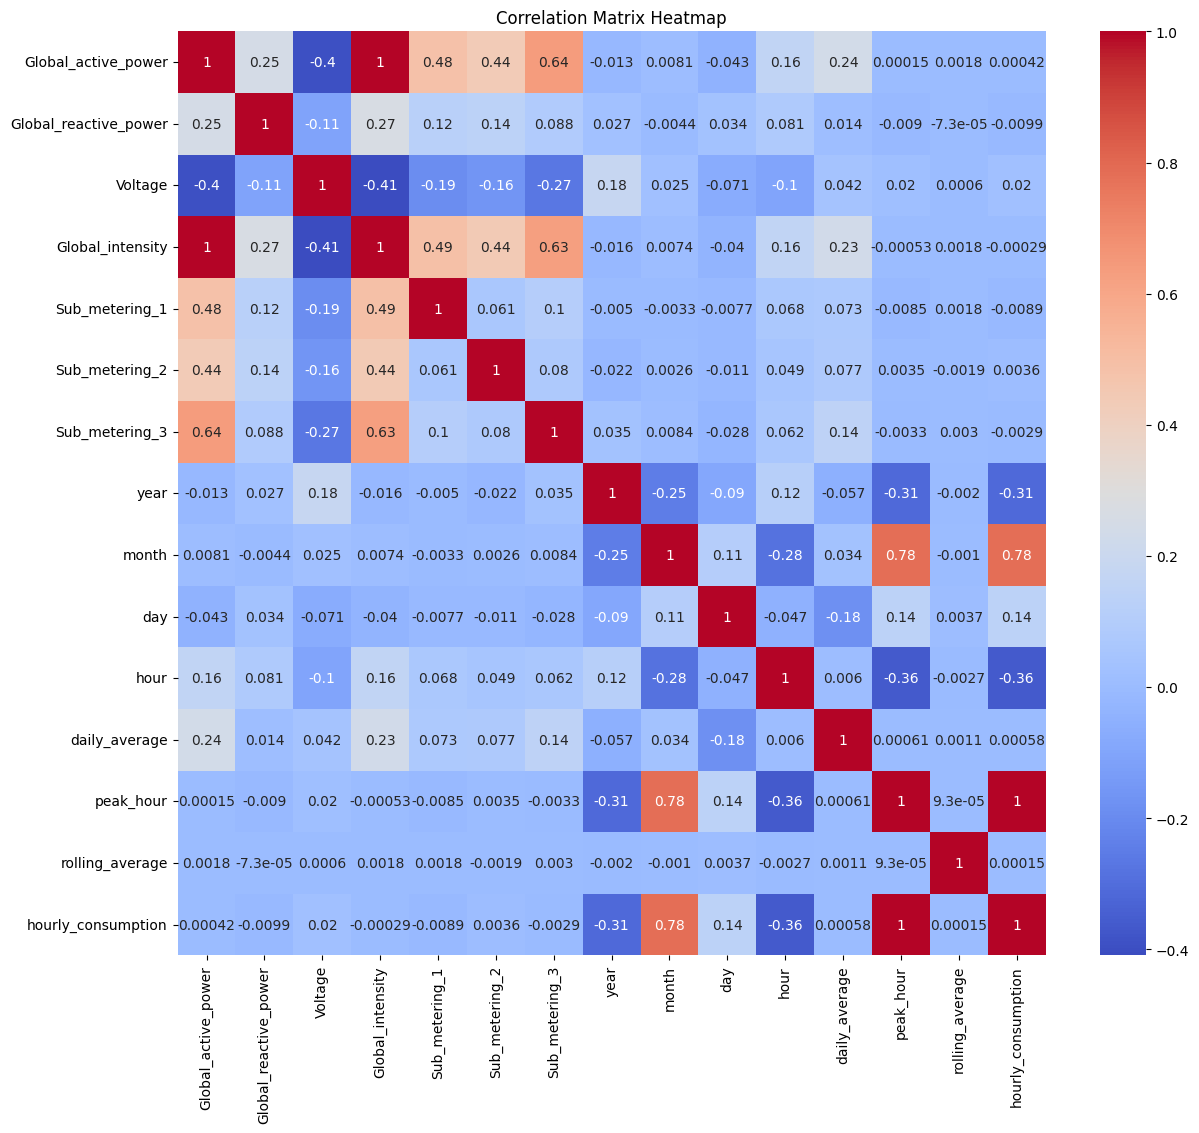

In [ ]:
corr_matrix = df[["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity", "Sub_metering_1", "Sub_metering_2",
       "Sub_metering_3", "year", "month", "day", "hour", "daily_average", "peak_hour", "rolling_average", "hourly_consumption"]].corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

# Observation - 11

**Key Predictors for Global_active_power:**

Sub_metering_3 (0.64), Global_intensity (0.48), and Sub_metering_1 (0.48) show strong positive correlations with Global_active_power, making them key predictors for modeling or forecasting power consumption.

**Voltage Dependency:**

Voltage has a weak negative correlation with Global_active_power (-0.40) and Global_intensity (-0.41), indicating that voltage variations have a limited and inverse relationship with overall power usage and current intensity.

**Feature Redundancy:**

High correlations among hourly_consumption, peak_hour, and month (each ~0.78) suggest potential redundancy. Also, features like hourly_consumption and rolling_average are extremely weakly correlated with most other variables, potentially offering limited unique information.

In [ ]:
X = df.drop(["datetime","Global_active_power","peak_hour","rolling_average"],axis=1)
y = df["Global_active_power"]

In [ ]:
# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Standardization

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# y_train_scaled = scaler.fit_transform(y_train)
# y_test_scaled = scaler.transform(y_test)

In [ ]:
# Define models

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Neural Network': MLPRegressor(random_state=42, max_iter=1000)
}

In [ ]:
# Hyperparameter grids

param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    },
    'Neural Network': {
        'hidden_layer_sizes': [(64,), (128, 64)],
        'activation': ['relu', 'tanh'],
        'alpha': [0.0001, 0.001]
    }
}

In [ ]:
# Training and hyperparameter tuning

best_models = {}
for model_name, model in models.items():
    print(f"Training {model_name}")
    if model_name in param_grids:
        grid_search = GridSearchCV(model, param_grids[model_name], cv=3, scoring='neg_mean_squared_error')
        if model_name == 'Neural Network':
            grid_search.fit(X_train_scaled, y_train)
        else:
            grid_search.fit(X_train, y_train)
        best_models[model_name] = grid_search.best_estimator_
        print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    else:
        model.fit(X_train, y_train)
        best_models[model_name] = model
    print(f"{model_name} training completed.")

Training Linear Regression
Linear Regression training completed.
Training Random Forest
Best Parameters for Random Forest: {'max_depth': None, 'n_estimators': 200}
Random Forest training completed.
Training Gradient Boosting
Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Gradient Boosting training completed.
Training Neural Network
Best Parameters for Neural Network: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (64,)}
Neural Network training completed.


In [ ]:
# Model evaluation

def evaluate_model(model, X_test, y_test, scaled=False):
    if scaled:
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, mae, r2

In [ ]:
print("\nModel Evaluation:")
results = []
for model_name, model in best_models.items():
    scaled = model_name in ['Neural Network', 'Gradient Boosting']
    mse, mae, r2 = evaluate_model(model, X_test, y_test, scaled)
    results.append((model_name, mse, mae, r2))
    print(f"{model_name} - MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

# Select the best model
best_model = sorted(results, key=lambda x: x[1])[0]  # Based on MSE
print(f"\nBest Model: {best_model[0]} with MSE: {best_model[1]:.4f}")


Model Evaluation:
Linear Regression - MSE: 0.0016, MAE: 0.0255, R2: 0.9985
Random Forest - MSE: 0.0011, MAE: 0.0183, R2: 0.9990
Gradient Boosting - MSE: 1.9658, MAE: 1.0179, R2: -0.7975
Neural Network - MSE: 0.0012, MAE: 0.0215, R2: 0.9989

Best Model: Random Forest with MSE: 0.0011
